In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import pearsonr

In [2]:
df_train = pd.read_csv('train.csv')
ans = df_train['correlation']

In [8]:
def corr(X, Y):
    return pearsonr(X, Y)[0]


def corrCV(image, i):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image[np.all(image == 255, axis=2)] = 0
    th, threshed = cv2.threshold(image, i, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # print(len(contours))
    X, Y = [], []
    for c in contours:  # find center point
        M = cv2.moments(c)
        if M['m00']:
            cX = M['m10']/M['m00']
            cY = M['m01']/M['m00']
            X.append(cX)
            Y.append(cY)
        cv2.circle(image, (int(cX), int(cY)), 0, (0, 0, 255), -1)
    result = -corr(X, Y)
    plt.figure(figsize = (45,30))
    cv2.drawContours(image, contours, -1, (255,0, 0), 2)
    plt.imshow(image)
    return result


# Find optimal threshold i
# for i in range(255):
#     results = []
#     for path in range(1000):
#         try:
#             result = corrCV(cv2.imread(os.path.join('train', f'{path}.jpg'), 3), i)
#             results.append(result)
#             if pearsonr(ans, results)[0] > 0.990375:
#                 print(pearsonr(ans, results)[0])
#                 print(i)
#         except:
#             pass

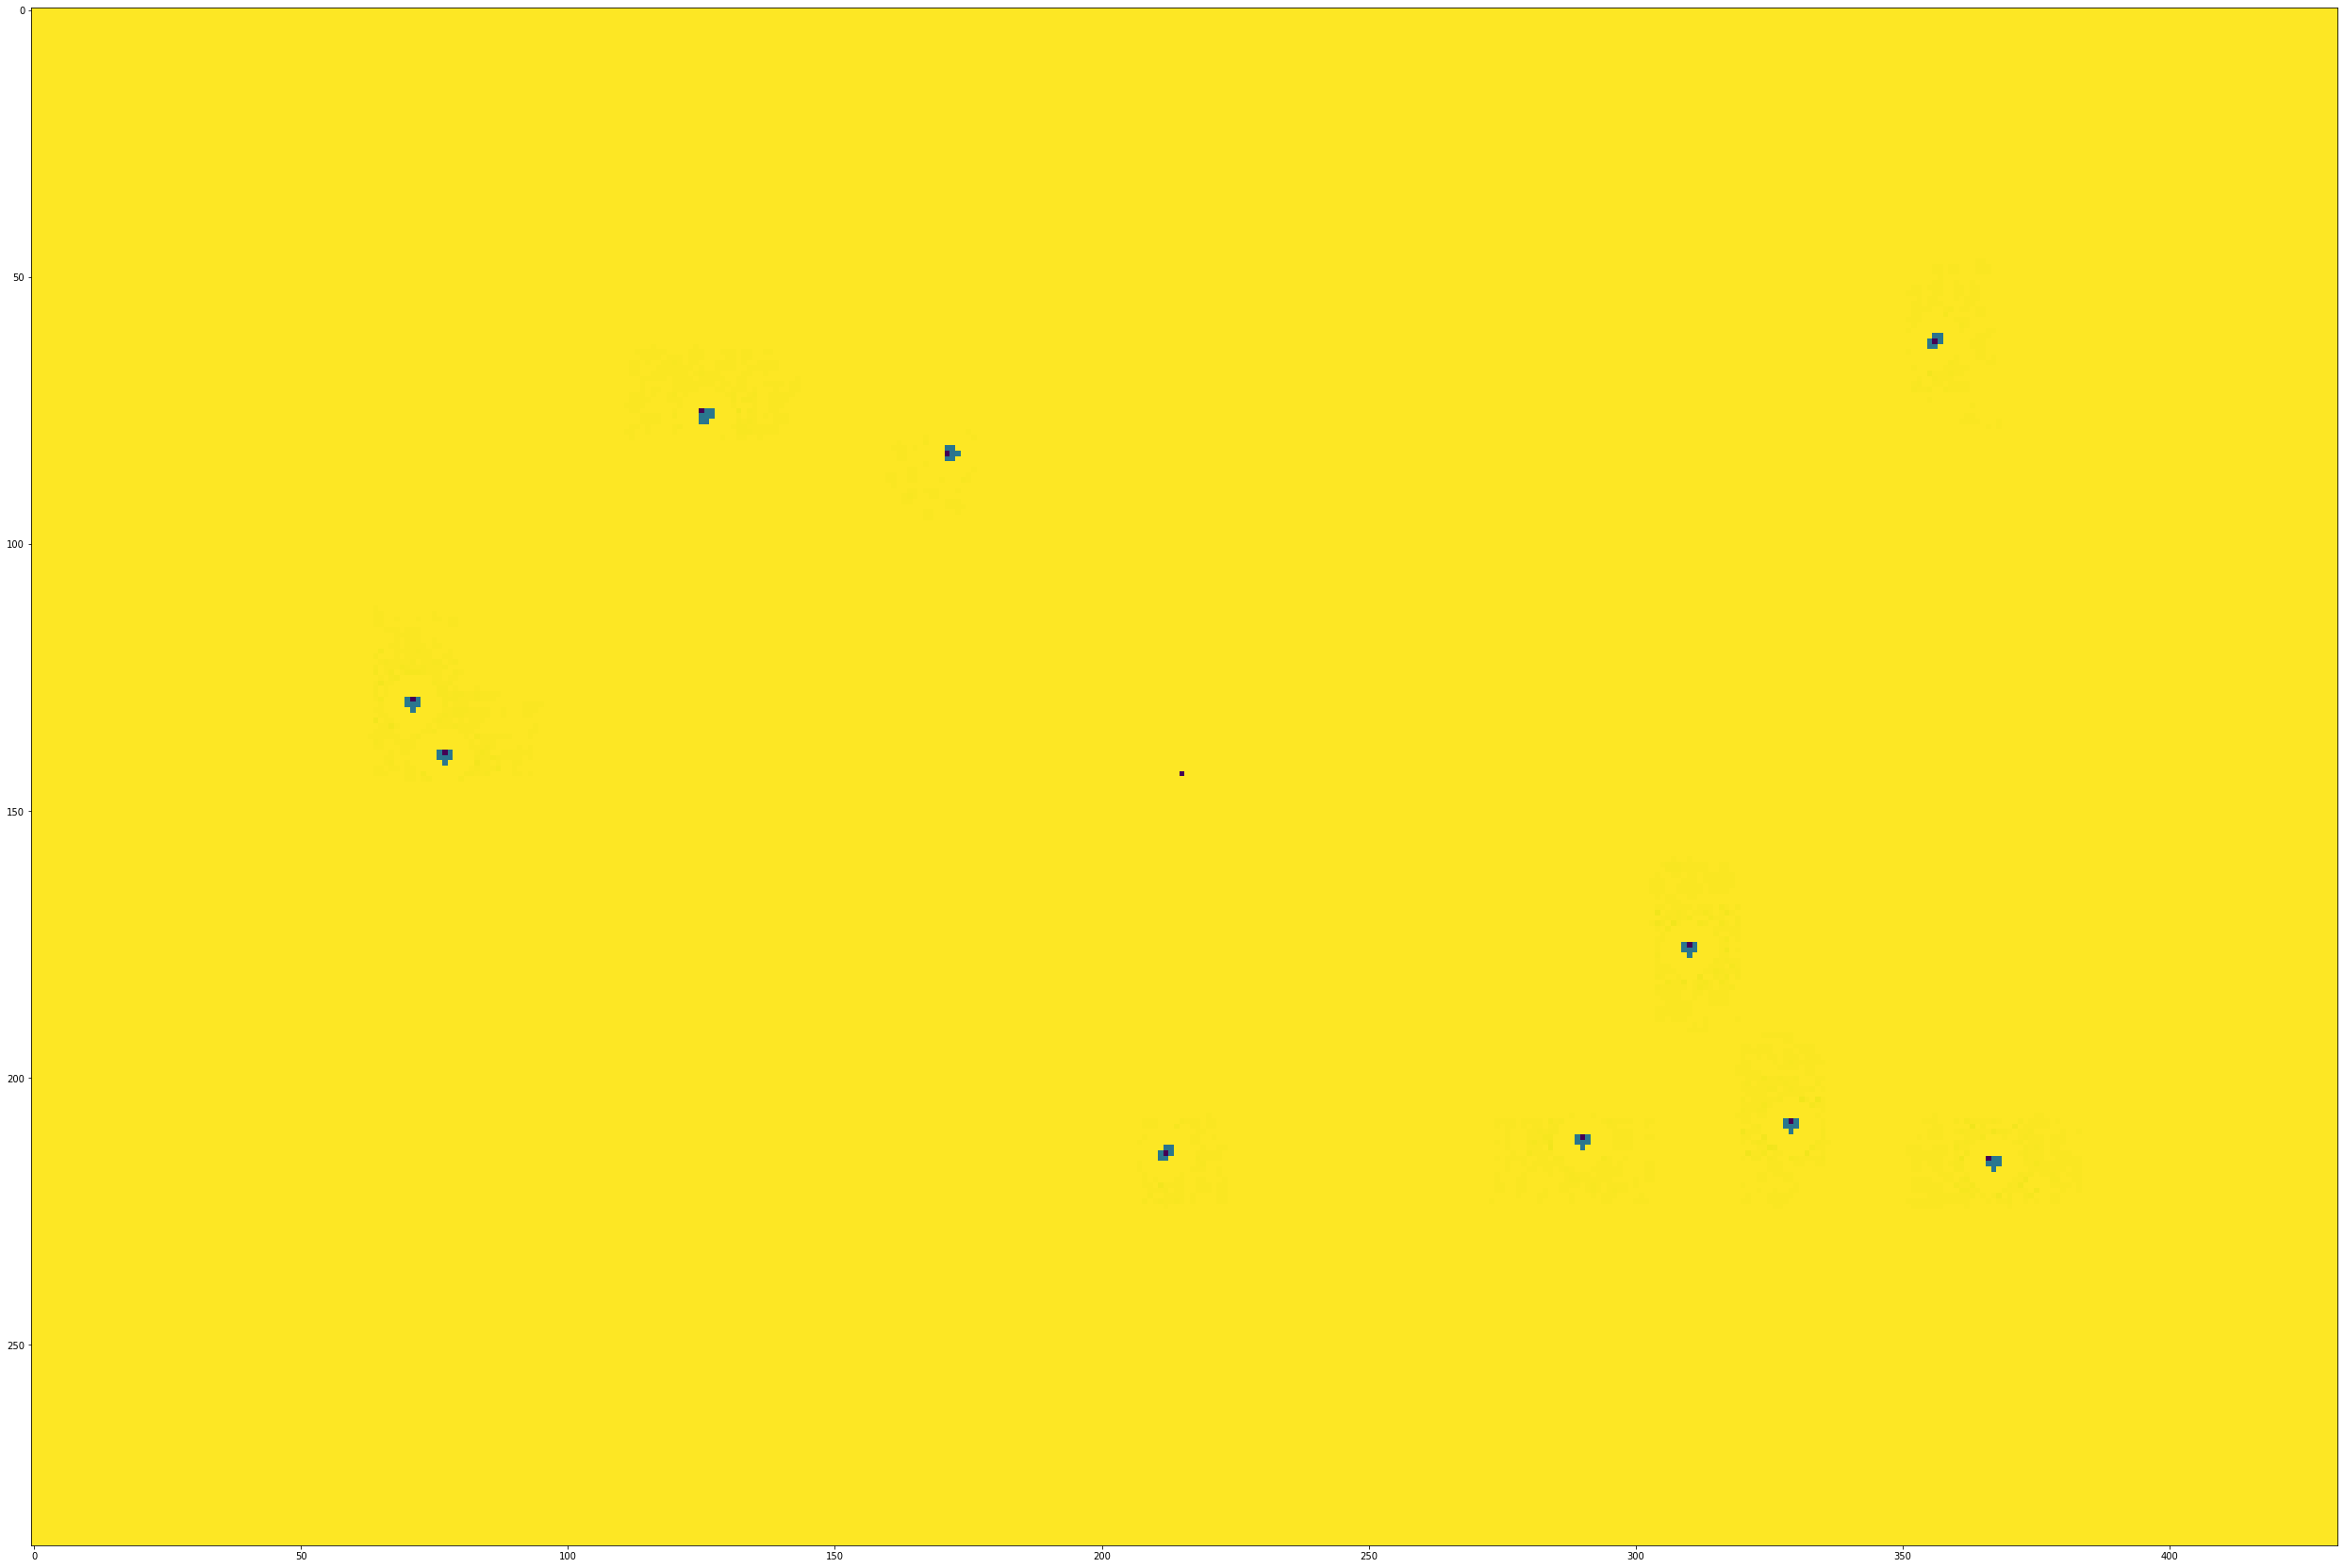

In [7]:
df_test = pd.read_csv('submission.csv')
results = []

for path in range(1000):
    result = corrCV(cv2.imread(os.path.join('test', f'{path}.jpg'), 3), 105)
    results.append(result)
    break

# df_test['correlation'] = results
# df_test.to_csv('submission.csv', index=False)

In [15]:
# Connect to graders
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/alien/Documents/PyCharm Projects/Cyberthon 2021/pyctfsglib.py')
import pyctfsglib as ctfsg
import random

USER_TOKEN = "WrlLCkymxwtgFwRHZsdmKfSwcdqIpnqoXEtRkciVRZJfBJUgcEJoxVZjNTQRdqkR" # You need to fill this up
GRADER_URL = random.choice([
  "http://chals.cyberthon22t.ctf.sg:50301/",
  "http://chals.cyberthon22t.ctf.sg:50302/"
])

grader = ctfsg.DSGraderClient(GRADER_URL, USER_TOKEN)
grader.submitFile('submission.csv')

DSGraderClient: Successfully Connected!
[SERVER] MOTD: CHECK your USER_TOKEN and GRADER_URL HTTP address! I'm CV_CORRELATED @637aa1e3bc7f
ProofOfWork Challenge =>  ('CTFSGRBdc79042585826e07cffb45419ea781ec', 22)
ProofOfWork Answer Found! =>  14965203


'{"challenge":{"name":"Correlated"},"id":"cl23ejqanda6308328edk797x","status":"PARTIALLY_CORRECT","multiplier":0.9745,"submittedBy":{"username":"hci-69"},"createdAt":"2022-04-17T14:47:24Z"}'